# Compare observations (Kay 2012 vs. 2021)

In [1]:
import sys
# Add common resources folder to path
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/CESM2_analysis')
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/CESM2_analysis/Common/')
# sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable, cmaps
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims,
    to_png
    )

from cloud_metric import Cloud_Metric
# from collections import deque
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## CERES-EBAF

In [2]:
obs2012_dir = '/glade/u/home/jonahshaw/w/kay2012_OGfiles'
newobs_ceresebaf = '/glade/u/home/jonahshaw/obs/CERES_EBAF/'

In [3]:
old_swcf = xr.open_dataset('%s/CERES-EBAF.SWCF.nc' % (obs2012_dir))
old_lwcf = xr.open_dataset('%s/CERES-EBAF.LWCF.nc' % (obs2012_dir))
new_ceres = xr.open_dataset('%s/CERES_EBAF-TOA_Ed4.1_Subset_200003-202002.nc' % (newobs_ceresebaf))

In [4]:
new_ceres_ss = new_ceres.sel(time=slice('2000-03-15','2010-02-16'))

In [5]:
new_ceres_ss['SWCF'] = (new_ceres_ss['toa_sw_clr_c_mon'] - new_ceres_ss['toa_sw_all_mon']).assign_attrs(
            {'units': 'W/m2','long_name': 'Shortwave cloud forcing'})

new_ceres_ss['LWCF'] = (new_ceres_ss['toa_lw_clr_c_mon'] - new_ceres_ss['toa_lw_all_mon']).assign_attrs(
            {'units': 'W/m2','long_name': 'Longwave cloud forcing'})

In [6]:
sw_2012 = add_weights(old_swcf['SWCFTOA'])
lw_2012 = add_weights(old_lwcf['LWCFTOA'])

In [7]:
sw_2012j = add_weights(new_ceres_ss['SWCF'])
lw_2012j = add_weights(new_ceres_ss['LWCF'])

In [8]:
sw_avg = masked_average(sw_2012,weights=sw_2012['cell_weight'])
print('CERES-EBAF SWCF (2012) avg: %s' % sw_avg.values)

lw_avg = masked_average(lw_2012,weights=lw_2012['cell_weight'])
print('CERES-EBAF LWCF (2012) avg: %s' % lw_avg.values)

sw_avg = masked_average(sw_2012j,weights=sw_2012j['cell_weight'])
print('CERES-EBAF SWCF (2021) avg: %s' % sw_avg.values)

lw_avg = masked_average(lw_2012j,weights=lw_2012j['cell_weight'])
print('CERES-EBAF LWCF (2021) avg: %s' % lw_avg.values)

CERES-EBAF SWCF (2012) avg: -47.071148
CERES-EBAF LWCF (2012) avg: 26.475805
CERES-EBAF SWCF (2021) avg: -45.839622
CERES-EBAF LWCF (2021) avg: 28.09088


### Differences between cloud forcing observations from 2012 (CERES-EBAF v?) and 2021 (CERES-EBAF v4). Same time period (2000-03 through 2010-02)

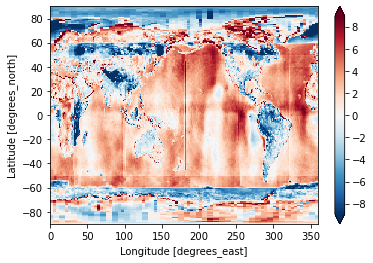

In [9]:
(new_ceres_ss['SWCF'].mean('time') - old_swcf['SWCFTOA']).plot(robust=True)

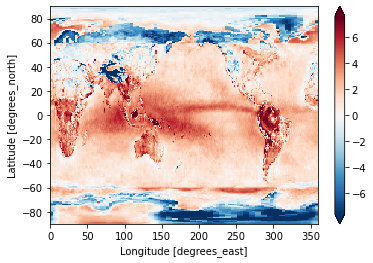

In [10]:
(new_ceres_ss['LWCF'].mean('time') - old_lwcf['LWCFTOA']).plot(robust='True')

## MISR

### Load original data as a cross-check

In [42]:
og_misr = xr.open_dataset('%s/MISR.CLDTOT_MISR.nc' % (obs2012_dir))
og_misr_cam4 = xr.open_dataset('%s/CAM4.CLDTOT_MISR.nc' % (obs2012_dir))
og_misrthick_cam4 = xr.open_dataset('%s/CAM4.CLDLOW_THICK_MISR.nc' % (obs2012_dir))

new_cltmisr = xr.open_dataset('%s/%s' % ('/glade/u/home/jonahshaw/w/obs/MISR','clt_MISR_20000301_20200531.nc'))

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'CLMISR' has multiple fill values {-1e+30, -999.0}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'CLDTOT_MISR' has multiple fill values {-1e+30, -999.0}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'CLDLOW_THICK_MISR' has multiple fill values {-1e+30, -999.0}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


In [25]:
og_cltmisr = add_weights(og_misr['CLDTOT_MISR'])
new_cltmisr = add_weights(new_cltmisr['clMISR'])

In [13]:
new_cltmisr_tavg= new_cltmisr.groupby('time.month').mean('time').mean('month')

In [14]:
og_cltmisr.shape

(180, 360)

In [15]:
new_cltmisr_tavg.shape

(180, 360)

### Very different here because I haven't masked the new observations. Nor do I entirely know how.

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/plot/plot.py:970: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  primitive = ax.pcolormesh(x, y, z, **kwargs)


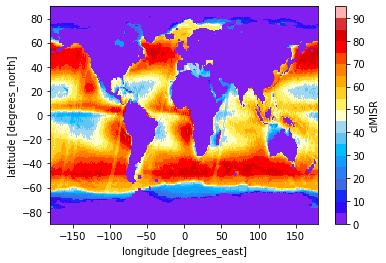

In [16]:
new_cltmisr_tavg.plot(cmap=cmaps.ncl_default,levels=np.arange(0,100,5))

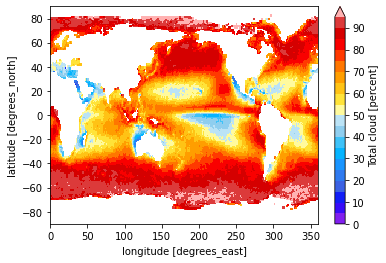

In [17]:
og_cltmisr.plot(cmap=cmaps.ncl_default,levels=np.arange(0,100,5))

In [20]:
og_cltmisr

<xarray.DataArray 'CLDTOT_MISR' (lat: 180, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    cell_weight  (lat, lon) float64 7.615e-05 7.615e-05 ... 7.615e-05 7.615e-05
Attributes:
    units:      percent
    long_name:  Total cloud

In [30]:
og_misr_cam4['CLDTOT_MISR'].mean()

<xarray.DataArray 'CLDTOT_MISR' ()>
array(44.826977, dtype=float32)

### This is how to process the CAM outputs to total cloud

In [40]:
misr_clttest = og_misr_cam4['CLMISR'].where(og_misr_cam4['CLMISR'].misr_tau>0.3).sum(dim=['misr_tau','misr_cth'])

In [41]:
misr_clttest.mean()

<xarray.DataArray 'CLMISR' ()>
array(44.826977, dtype=float32)

In [45]:
og_misrthick_cam4['CLDLOW_THICK_MISR'].mean()

<xarray.DataArray 'CLDLOW_THICK_MISR' ()>
array(5.618442, dtype=float32)

### This is how to process the CAM outputs to thick cloud

In [47]:
cells = np.bitwise_and((og_misrthick_cam4['CLMISR'].misr_tau > 23),(og_misrthick_cam4['CLMISR'].misr_cth < 3))
misrthick = og_misrthick_cam4['CLMISR'].where(cells).sum(dim=['misr_tau','misr_cth'])

In [48]:
misrthick.mean()

<xarray.DataArray 'CLMISR' ()>
array(5.618442, dtype=float32)

In [ ]:
cells5 = np.bitwise_and((cam5_da['CLMODIS'].cosp_tau_modis > 23),(cam5_da['CLMODIS'].cosp_prs < 440))
proc_modis5 = cam5_da['CLMODIS'].where(cells5).sum(['cosp_tau_modis','cosp_prs'])